# Project: TMDb movie dataset under investigation

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
### Overview

In order to complete my first project of the data analyst nanodegree program at Udacity, I had to choose 1 from 5 datasets that you can find in <a href="https://docs.google.com/document/d/e/2PACX-1vTlVmknRRnfy_4eTrjw5hYGaiQim5ctr9naaRd4V9du2B5bxpd8FEH3KtDgp8qVekw7Cj1GLk1IXdZi/pub">here</a>. Once I opened the first dataset, which is related to "TMDb movie data", I got interested to know more about: 

<ol>
    <li>What kinds of properties are associated with movies with high profitability?</li>
    <li>What are the caracteristics that influence the votes on movies?</li>
    <li>Who are top 10 actors/actrices in terms of number of appearances in the profitable movies ? </li>
    <li>Who are the top 5 directors of profitable movies ?  </li>
    <li>Which genres are most popular among profitable movies? </li>
    <li>Which production companies are associated with movies that have high profitability?</li>
</ol>

So I decided to work using this dataset in order to fulfill my curiosity. In fact, in the following sections, we will be trying to answer the above questions. However, after scrolling a bit in the csv file, I noticed some missing data, and columns with many inputs separated by the symbol "|". So, obviously the data needs some assessment and cleaning before deeply exploring it in order to get some reliable findings.




### Project requirements

I worked this project using python 3.6 in an anaconda3 environment with the help of libararies such as Pandas, Numpy and Matplotlib.

In [ ]:
# import needed packages

import pandas as pd
import numpy as np
from datetime import datetime as dt
import matplotlib.pyplot as plt
#import seaborn as sns
%matplotlib inline  


<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, I will load in the data, check for cleanliness, and then trim and clean the dataset for analysis. I will make sure that I document all the steps carefully and justify any cleaning decisions.

### General Properties

In [ ]:
# Load your data and print out a few lines. Perform operations to inspect data
movies_df = pd.read_csv('1_project1_data/Movie_Data/tmdb-movies.csv')
# display first five rows of data
movies_df.head()

In [ ]:
# display last two rows of data
movies_df.tail(2)

It seems we have: 
- A dataset of 21 columns with a header that contains labels.
- Certain columns, like ‘cast’, ‘genres’ and ‘production_companies’  contain multiple values separated by pipe (|) characters.
- There are some odd characters in the ‘cast’ column that we can leave as is.
- The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time. This might help for instance to figure out how much money was spent on successful old movies  compared to the new ones.
- Some movies have budget and revenue of 0$.

In [ ]:
# this returns a tuple of the dimensions of the dataframe
movies_df.shape

The data is 10866 rows (header excluded) and 21 columns

In [ ]:
# this displays a concise summary of the dataframe,
# including the number of non-null values in each column
movies_df.info()

Based on the datatypes displayed, I noticed that:
<ol>
    <li>"release_date" is currently an object while it should be a datetime</li>
    <li>"budget_adj" and "revenue_adj" are both float and it would be better and easily readable if they were integers as the "budget" and "revenue" columns</li>
</ol>

Also, it seems that some columns are not relevant to answer our questions such as "id", "imdb_id", "homepage", "tagline", "overview",  and "keyword" and we can get rid of them.
There are some cells that are Null in many columns and this needs more investigation to determine the significance of keeping or deleting them.

In [ ]:
# this returns useful descriptive statistics for each column of data
movies_df.describe()

In [ ]:
# check for duplicates in the data
sum(movies_df.duplicated())

This function suggests that there is 1 duplicated row in the dataset that we need to delete before proceeding in our analysis.

In [ ]:
# this returns the number of unique values in each column
movies_df.nunique()

### Data Cleaning

After observing data using different pandas functions, it's time to start data cleaning in order to be able to investigate data without any problems. To do that, we are going to:

**1. Remove unused columns as mentioned above ("id", "imdb_id", "homepage", "tagline", "overview",  and "keyword"):**

In [ ]:
# Function to drop the specified columns of first row (axis=1) and keep the changes (inplace=True)
movies_df.drop(['id','imdb_id','homepage','tagline','overview','keywords'], axis=1 , inplace=True)
movies_df.head()

In [ ]:
movies_df.shape

Now we have only 15 columns instead of 21 previously.

**2. Remove the dupicated row:**

In [ ]:
movies_df.drop_duplicates()

Now we have 10865 rows instead of 10866

**3. Remove all the movies that have a "budget" or "revenue" of 0$ since these are movies with important missing data to calculate profitability.**


In [ ]:
# To do that, we are going to replace all values equal to 0 in both columns with NA, and then use the function dropna:
# The following takes a dataframe and replace every 0 with NA
#
null_profit=['budget','revenue']
movies_df[null_profit]=movies_df[null_profit].replace(0,pd.NA)


In [ ]:
movies_df.tail()

In [ ]:
# Now let's use the prebuilt function dropna() in order to delete all rows that contain NA in one of 
# the 'budget' or 'revenue' columns.

movies_df.dropna(subset = null_profit, inplace = True)

In [ ]:
movies_df.shape

Now we have 3855 rows (movies) left and 15 columns

In [ ]:
movies_df.describe()

**4. Replace 0 runtime of some movies with NA, in order to calculate the real mean value while studying characteristics of profitable movies.**

After removing all the movies with missing budget data, also, all movies with runtime of 0 minutes were removed. so we don't need any further operation on that matter.

**5. convert release_date type into datetime instead of object.**


In [ ]:
# Use pandas.to_datetime() to convert string to datetime format
# source of inspiration: https://sparkbyexamples.com/pandas/pandas-change-string-object-to-date-in-dataframe/
movies_df.release_date = pd.to_datetime(movies_df['release_date'])
movies_df.info()

**6. Convert 'budget_adj' and 'revenue_adj' types into integer since knowing about the value of cents is not really relevent in our study:**

In [ ]:
# source of inspiration: https://www.geeksforgeeks.org/convert-floats-to-integers-in-a-pandas-dataframe/

movies_df=movies_df.astype({'budget':'int','revenue':'int','budget_adj':'int','revenue_adj':'int'})

In [ ]:
movies_df.dtypes

**7. We check if we don't have any null values in each column**

In [ ]:
# Let's check total of non-null values for each column
movies_df.notna().sum()

It seems there are still missing data in the following columns:

    - cast  3851/3855 (4 movies with missing cast)

    - director  3854/3855 (1 movie with missing director)
    
    - production_companies  3809/3855 (46 movies with missing production_companies)

Let's eliminate all these movies with missing data from our analysis 

In [ ]:
# Now let's use the prebuilt function dropna() in order to delete all rows that contain NA in one of 
# the 'cast', 'director' or 'production_companies' columns.
# source of inspiration is the official documentation

null_staff=['cast','director','production_companies']

movies_df.dropna(subset = null_staff, inplace = True)

In [ ]:
# Total of non-null values for each column
movies_df.notna().sum()

Now all the remaining 15 columns have 3806 input without any null values.

In [ ]:
movies_df.head()

In [ ]:
movies_df.describe()

Now I am satisfied with the cleaned dataset, so it is time to start exploring it.

<a id='eda'></a>
## Exploratory Data Analysis

Disclaimer:  This project is open-ended in that there is not one right answer and the following findings are tentative.We are not required to use inferential statistics or machine learning to complete it.

Now let's start finding some real insights about the chosen dataset:

### Research Question 1: What kinds of properties are associated with movies with high profitability?

Let's consider that:

    - Best profitable movies: are movies which have a revenue equal or greater than the double of the budget.
        e.g. budget=1000 then revenue=>2000
    - Average profitable movies: are movies which have a revenue less than the double of the budget and greater or equal to 150% of the budget.
        e.g. budget=1000 then 1500<=revenue<2000
    - Worst profitable movies: are movies which have a revenue less than 150% of the budget.
        e.g. budget=1000 then revenue<1500

These are the 3 categories we are going to study during our analysis to answer the current main question.

   **a. Which movies are best, average or worst in terms of profitablity?**
    
    For that, let's create a new column called 'profitability' in which we label each movie with (best,average or worst) according to the above definitions.

In [ ]:
# Below, we create a new column called "profitability" in which we put one of the 3 possible inputs 
# ("best", "worst" or "average") depending on the comparison between "budget" and "revenue" values of the same row 
# and according to the profitability explination above.
# inspired from: https://stackoverflow.com/questions/66722004/using-pandas-lambda-to-compare-two-text-strings-from-different-columns

movies_df['profitability']=movies_df[['budget','revenue']].apply(lambda x: "best" if x.revenue>=x.budget*2 else ("worst" if x.revenue < x.budget * 1.5 else "average"), axis=1)

In [ ]:
movies_df.shape

Now we have a new column called profitability.

In [452]:
movies_df.profitability.value_counts()


best       2013
worst      1450
average     343
Name: profitability, dtype: int64

This new column shows us that in terms of profitabily, we have:

2013 movies are in the "best" profitable category
343 movies are in the "average" category, and       
1450 movies are in the "worst" category.

Now let's study each category apart, with a main focus on the best category of profitable movies:

**b. What are the caracteristics of MOVIES for each profitability category**

   **b.1: what is the mean runtime?**

In [453]:
# We calculate the mean runtime for each category (group) in profitability
movies_df.groupby('profitability').runtime.mean()

profitability
average    111.868805
best       110.125186
worst      107.668966
Name: runtime, dtype: float64

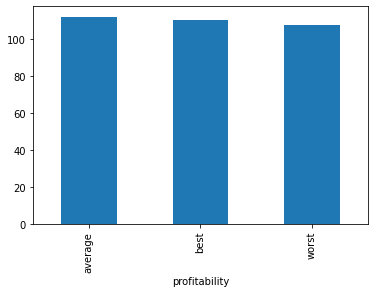

In [454]:
# Let's plot the results:
movies_df.groupby('profitability').runtime.mean().plot(kind='bar');

We notice that the runtime mean doesn't differ much between the 3 profitability categories of movies with:
    - 110.125186 minutes is the mean runtime of best movies
    - 111.868805 minutes is the mean runtime of average movies
    - 107.668966 minutes is the mean runtime of worst movies

**b.2. What are the distributions of the 3 categories in terms of years of release?**

In [495]:
# the function below takes 8 arguments and plots a graph of evolution of:
#  1- total number of movies since the 1960's up to 2015, and
#  2- number of best,average and worst movies in terms of profitability in the same period
# source of inspiration is the lesson 6 of the nanodegree: programming workflow for data analysis 


def plot_hist(arr0,arr1,arr2,arr3,label0,label1,label2,label3):
    plt.plot(arr1,  color='g', label=label1);
    plt.plot(arr2,  color='r', label=label2);
    plt.plot(arr3,  color='b', label=label3);
    plt.plot(arr0,  color='#000000', label=label0)
    plt.legend()
    plt.xlabel('Year of release', fontsize = 12)
    plt.ylabel('Number of movies', fontsize = 12)
    plt.title('Number of movies by profitability category from 1960 to 2015')
    plt.grid(True)
    plt.show()

In [456]:
# create a dataframe for each profitability category
movies_df_best=movies_df.query('profitability=="best"')
movies_df_average=movies_df.query('profitability=="average"')
movies_df_worst=movies_df.query('profitability=="worst"')

In [457]:
# count the whole number of movies by years of release

movies_in_years=movies_df.groupby('release_year')['profitability'].count();
#print(movies_in_years)

In [458]:
# count the number of movies labelled as best in terms of profitability by years of release
best_in_years=movies_df_best.groupby('release_year')['profitability'].count();

In [460]:
# count the number of movies labelled as average in terms of profitability by years of release

average_in_years=movies_df_average.groupby('release_year')['profitability'].count();

In [459]:
# count the number of movies labelled as worst in terms of profitability by years of release

worst_in_years=movies_df_worst.groupby('release_year')['profitability'].count();

In [461]:
# convert them back to dataframes
movies_in_years=movies_in_years.to_frame()
best_in_years=best_in_years.to_frame()
worst_in_years=worst_in_years.to_frame()
average_in_years=average_in_years.to_frame()

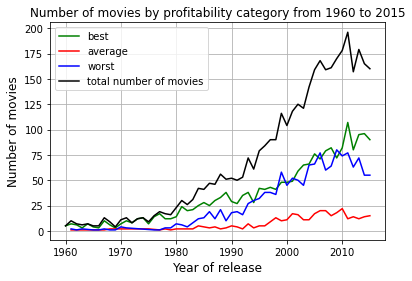

In [496]:
# Here we use the function already defined in order to see the graph that progress of number of best,average and worst movies
# during the period of time from 1960 to 2015:
best="best"
average="average"
worst="worst"
all="total number of movies"
plot_hist(movies_in_years.profitability, best_in_years.profitability,average_in_years.profitability,worst_in_years.profitability,all,best,average,worst)

Based on the dataset we have, It seems that the total number of movies has generally gone up, and also the number of best, average and worst movies in terms of profitability has done so. In few certain years, the number of average movies exceeded the number of best movies.

Now let's see who were the directors in each category.

   **b.3. Who were the directors of best movies?**

In [463]:
# Count the number of best profitable movies directed by each director and sort them in a descending way
best_movies_directors=movies_df_best.groupby('director')['profitability'].count().sort_values(ascending=False);
print(best_movies_directors)

director
Steven Spielberg                 25
Clint Eastwood                   18
Tim Burton                       12
Woody Allen                      11
Ron Howard                       10
                                 ..
Jonathan Frakes                   1
Jonathan Kaplan                   1
Chris Kentis                      1
Chris Gorak                       1
Aaron Seltzer|Jason Friedberg     1
Name: profitability, Length: 1033, dtype: int64


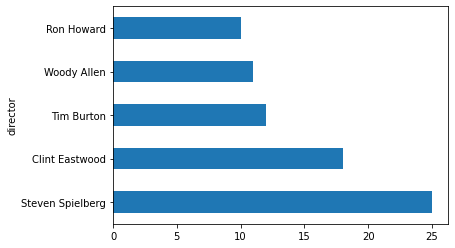

In [464]:
# The following code plots only the number of best profitable movies directed by the first 5 directors in the list 
# inspiration source: https://stackoverflow.com/questions/37333165/plot-specific-rows-of-a-pandas-dataframe

best_movies_directors.iloc[0:5].plot.barh(y='director');

5 Directors who directed the highest number of best movies are:

Steven Spielberg    25 movies

Clint Eastwood      18 movies

Tim Burton          12 movies

Woody Allen         11 movies

Ron Howard          10 movies

It looks like if a movie is directed by one of these directors, the probability to have a highly profitable movie is high. But a more scientific methodology is required to confirm that.

 **b.4. What are the most successful genres of best movies?**

The column genre contains many genres separated by pipe "|" for each movie. So to answer this question, we need to find a solution to count each genre alone.

    Since not only the column "genre" that has this problem, but also "cast" and "production_companies", it will be wise to create a function that does the job for the 3 of them.

In [430]:
# This function takes the name of an existing column at "movies_df_best" dataframe as an arg
# then access it  and concatenates all the values into a single string separated
# with the same sep="|", then puts everything in a series in order to be able to count how many times each value has been
# repeated and return the result in a dataframe.

def how_many(column,column_name):
    column_data=movies_df_best[column].str.cat(sep='|')
    column_data=pd.Series(column_data.split('|'))
    count_repeated_data=column_data.value_counts(ascending = False)
    count_series=count_repeated_data.rename(column_name)
    count_df=count_series.to_frame()
    return count_df

In [436]:
print(how_many('genres',"genres"))

                 genres
Drama               831
Comedy              729
Thriller            610
Action              548
Adventure           407
Romance             345
Crime               314
Horror              276
Science Fiction     264
Family              251
Fantasy             209
Mystery             164
Animation           119
Music                73
War                  62
History              54
Western              22
Documentary          20
TV Movie              1


In [439]:
# store the returned dataframe of the function for genres.
df_best_genres=how_many('genres',"genres")

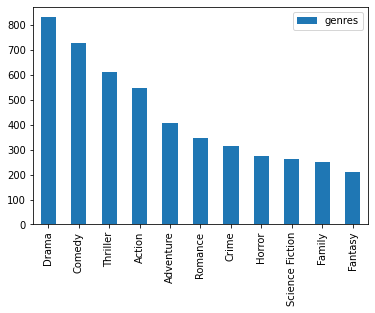

In [443]:
# plot the results for the first 11 most popular genres
df_best_genres.iloc[0:11].plot.bar(y='genres');

10 most successful genres in best profitable movies are:

Drama               831

Comedy              729

Thriller            610

Action              548

Adventure           407

Romance             345

Crime               314

Horror              276

Science Fiction     264

Family              251

**b.5. What are the most successful actors/actrices in terms of appearences in best profitable movies?**


In [444]:
# store the returned dataframe of the function for cast.

df_best_cast=how_many('cast',"cast")

In [445]:
print(how_many('cast',"cast"))

                   cast
Tom Cruise           29
Tom Hanks            25
Robert De Niro       25
Brad Pitt            23
Samuel L. Jackson    22
...                 ...
Sam Reid              1
Shannon Woodward      1
Rachael Markarian     1
Mia Moretti           1
Arthur O'Connell      1

[4612 rows x 1 columns]


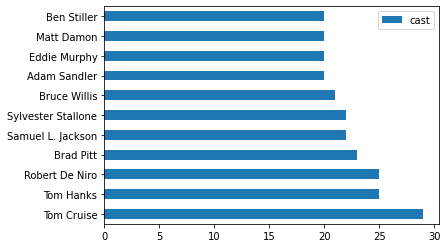

In [447]:
# plot the results for the first 11 most appearing actors/actrices in "best" movies

df_best_cast.iloc[0:11].plot.barh(y='cast');

5 most appearing Actors in successful profitable movies are:

Tom Cruise           29 appearences in best movies

Tom Hanks            25 appearences in best movies

Robert De Niro       25 appearences in best movies

Brad Pitt            23 appearences in best movies

Samuel L. Jackson    22 appearences in best movies


**b.6. What are the most successful production companies which produce best profitable movies?**


In [448]:
# store the returned dataframe of the function for production companies.

df_best_production_companies=how_many('production_companies',"production_companies")

In [449]:
print(how_many('production_companies','production_companies'))

                                        production_companies
Universal Pictures                                       207
Warner Bros.                                             172
Paramount Pictures                                       163
Twentieth Century Fox Film Corporation                   141
Columbia Pictures                                        105
...                                                      ...
Raindog Films                                              1
Catch 23 Entertainment                                     1
Producers Circle                                           1
Walt Disney Animation Canada                               1
Chenault Productions                                       1

[1887 rows x 1 columns]


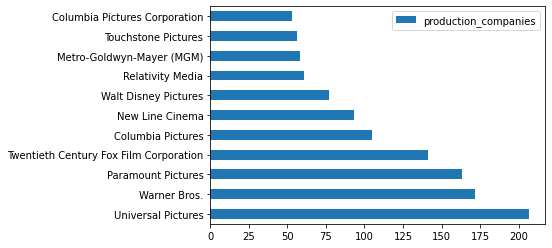

In [450]:
# plot the results for the best 11 production companies of "best" movies

df_best_production_companies.iloc[0:11].plot.barh(y='production_companies');

The 5 most successful production companies which produce best profitable movies are:

Universal Pictures                        207 movies

Warner Bros.                              172 movies

Paramount Pictures                        163 movies

Twentieth Century Fox Film Corporation    141 movies

Columbia Pictures                         105 movies

We have answered many questions, especially those which are related to the 'best' category. We can do the same for both other categories (average and worst) to find more insights about them.

Now let's dive into another big question:

### Research Question 2:  What are the caracteristics that influence the votes on movies?

First, let's find out the following:

**a. Are there any flagrant correlations related to the voting subject?**

In [465]:
# display a table of correlations
movies_df.corr()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
popularity,1.000000,0.443634,0.613815,0.213758,0.779136,0.319987,0.175890,0.395351,0.544789
budget,0.443634,1.000000,0.687051,0.259577,0.554692,0.023008,0.271856,0.958233,0.530940
revenue,0.613815,0.687051,1.000000,0.249281,0.753591,0.228211,0.141175,0.655883,0.900459
runtime,0.213758,0.259577,0.249281,1.000000,0.273538,0.359373,-0.113646,0.333490,0.279836
vote_count,0.779136,0.554692,0.753591,0.273538,1.000000,0.389916,0.209568,0.495228,0.653228
vote_average,0.319987,0.023008,0.228211,0.359373,0.389916,1.000000,-0.135897,0.035915,0.268383
release_year,0.175890,0.271856,0.141175,-0.113646,0.209568,-0.135897,1.000000,0.078304,-0.102046
budget_adj,0.395351,0.958233,0.655883,0.333490,0.495228,0.035915,0.078304,1.000000,0.567999
revenue_adj,0.544789,0.530940,0.900459,0.279836,0.653228,0.268383,-0.102046,0.567999,1.000000


It seems like if there might be a relationship between:

- 'popularity' and 'vote_count' with a correlation number = 0.779136

- 'revenue' and  'vote_count' with a correlation number = 0.753591


In [ ]:
# get quick insights about relationships between numerical variables in movies_df
pd.plotting.scatter_matrix(movies_df,figsize=(15,15));

**b. How popular are movies with the highest vote counts?** 

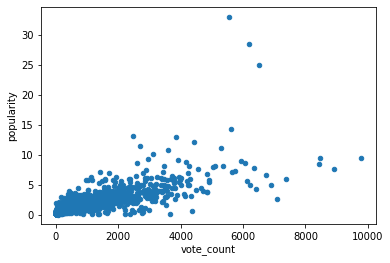

In [514]:
# plots values according to popularity and vote counts of movies
movies_df.plot(x='vote_count', y='popularity', kind='scatter');

**c. How popular are movies with the highest vote average?** 

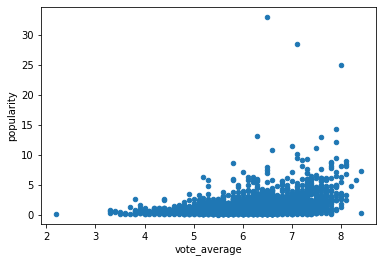

In [512]:
# plots values according to popularity and vote average of movies

movies_df.plot(x='vote_average', y='popularity', kind='scatter');

It seems there are some movies with really good vote_average but they are not so popular, and others with medium vote average with better popularity.

**d. How does the vote counts is related to the revenue of a movie?**

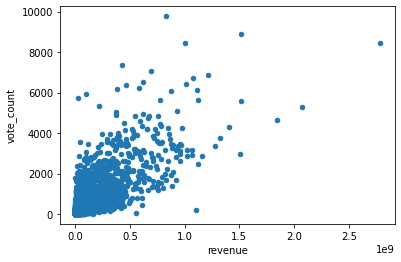

In [515]:
# plots values according to popularity and vote average of movies

movies_df.plot(x='revenue', y='vote_count', kind='scatter');

Although it is true for a lot of movies, but we can't say that there is a general tendency for movies to have better revenue when they get more vote counts because a lot of exceptions exist. 

**e. What are the months of releases that generate the most vote counts?**

In [476]:
#Creates a new column called 'month' which contains only month of release of the movies
movies_df['month'] = pd.to_datetime(movies_df['release_date']).dt.month

In [469]:
movies_df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profitability,mm
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,137999939,1392445892,best,6
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,137999939,348161292,best,5
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,101199955,271619025,best,3
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,183999919,1902723129,best,12
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,174799923,1385748801,best,4


In [482]:
# Calculates the sum of vote counts realized each month of the year
movies_df_votes_per_month=movies_df.groupby('month')['vote_count'].sum()

In [483]:
print(movies_df_votes_per_month)

month
1      82713
2      98659
3     156767
4     128197
5     219166
6     245506
7     209740
8     122154
9     169706
10    180000
11    186188
12    233789
Name: vote_count, dtype: int64


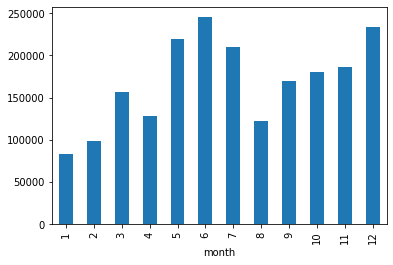

In [484]:
# Plots the sum of vote counts for each month
movies_df_votes_per_month=movies_df.groupby('month')['vote_count'].sum().plot(kind='bar');

The months where there is a clear peak of voting are months 5,6,7 and 12 of the year.

Let's see if it is the same for 'best' movies category:

In [ ]:
#Creates a new column called 'month' which contains only month of release of the movies
movies_df_best['month'] = pd.to_datetime(movies_df_best['release_date']).dt.month

In [493]:
movies_df_best_votes_per_month=movies_df_best.groupby('month')['vote_count'].sum()

In [494]:
print(movies_df_best_votes_per_month)

month
1      57313
2      71533
3     124733
4      98151
5     183292
6     206734
7     178604
8      84872
9     105187
10    135662
11    157471
12    195799
Name: vote_count, dtype: int64


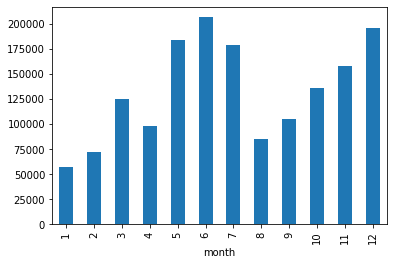

In [491]:
# Plots the sum of vote counts of best movies for each month 
movies_df_best_votes_per_month=movies_df_best.groupby('month')['vote_count'].sum().plot(kind='bar');

It's also the same as for the dataframe of the whole movies, the months where there is a clear peak of voting in the 'best' movies category are months 5,6,7 and 12 of the year. May be in those months people watch Movies more than the other months.

<a id='conclusions'></a>
## Conclusions


Although we are not sure that this data is updated and totally correct, this analysis of TMDb dataset gave us some insights
we might be looking at in order to increase the probability of a movie to double it's budget in revenue and be successful:

1. Have one of these directors: Steven Spielberg, Clint Eastwood, Tim Burton or Woody Allen
2. Have at least one of these actors: Tom Cruise, Tom Hanks, Robert De Niro, Brad Pitt, Samuel L. Jackson
3. Must be categorized at least in one of these genres : Drama, Comedy, Thriller, Adventure
4. Must be produced by one of these production companies: Universal Pictures, Warner Bros, Paramount Pictures, Twentieth Century Fox Film Corporation, Columbia Pictures.
5. Have a mean runtime of 110.125186 minutes, and
6. Release it in one of the months: 5,6,7 or 12 to have most possible interaction with the audience.


Eventually, I want to emphasize on the fact that this analysis was limited only to the provided dataset which had a lot of missing data and contained movies released up only to 2015. It still needs more analysis and statistical tests in order to be able to give statistical conclusions.